In [7]:
print("Good afternoon favour")

Good afternoon favour


=== FIXED SSD Object Detection System ===
Initializing SSD detector...
Loading SSD MobileNet model from TensorFlow Hub...
Testing model with dummy input...
Model test successful!
Output keys: ['detection_anchor_indices', 'detection_boxes', 'detection_classes', 'detection_multiclass_scores', 'detection_scores', 'num_detections', 'raw_detection_boxes', 'raw_detection_scores']
✓ Pre-trained SSD MobileNet model loaded successfully

🎯 COCO Dataset Found! Testing with COCO images...
loading annotations into memory...
Done (t=25.75s)
creating index...
index created!

🔍 Testing SSD on 3 COCO images...

--- Image 1: 000000391895.jpg ---
⏱️  Detection time: 0.075s
📊 Ground truth objects: 4
🎯 SSD detections: 18
🔍 SSD found:
  1. person: 0.741
  2. bicycle: 0.574
  3. motorcycle: 0.496
  4. skis: 0.457
  5. person: 0.445
  6. skis: 0.440
  7. person: 0.439
  8. handbag: 0.413
  9. person: 0.385
  10. car: 0.383
  11. person: 0.375
  12. skis: 0.358
  13. motorcycle: 0.354
  14. person: 0.349
  15.

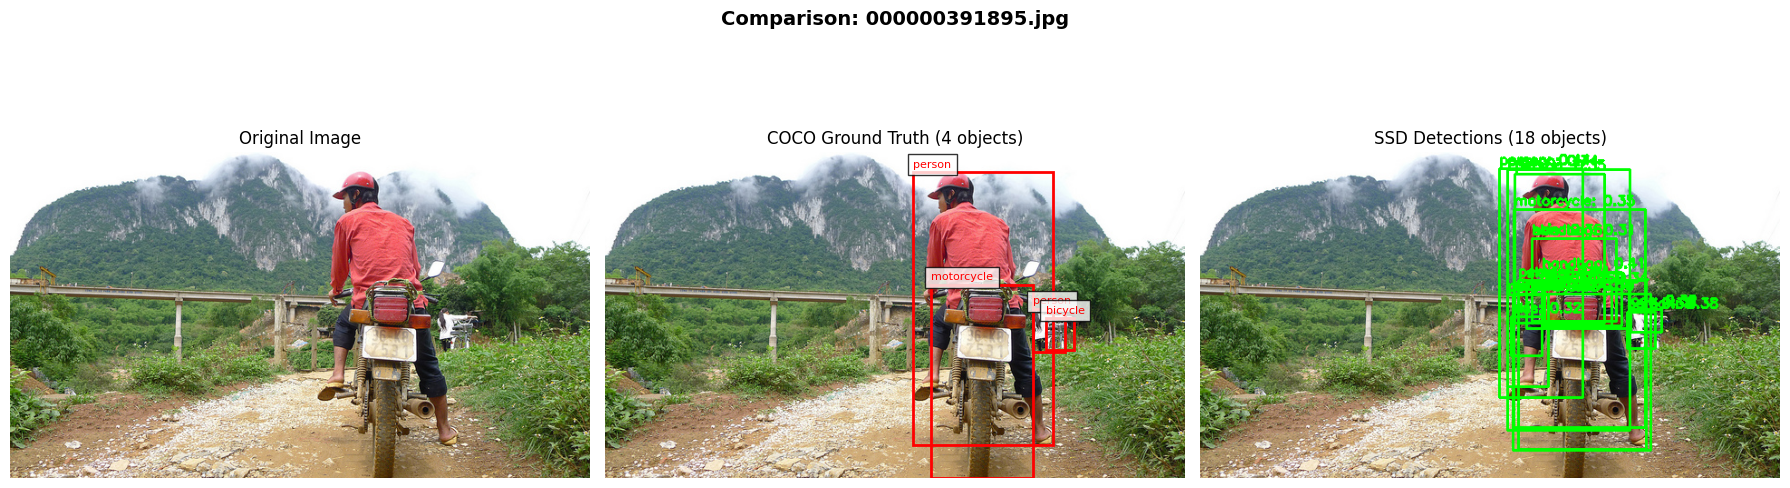

📊 Comparison saved as: comparison_1.jpg
--------------------------------------------------

--- Image 2: 000000522418.jpg ---
⏱️  Detection time: 0.052s
📊 Ground truth objects: 4
🎯 SSD detections: 8
🔍 SSD found:
  1. person: 0.579
  2. keyboard: 0.409
  3. mouse: 0.383
  4. clock: 0.370
  5. toilet: 0.326
  6. person: 0.325
  7. bird: 0.311
  8. refrigerator: 0.303


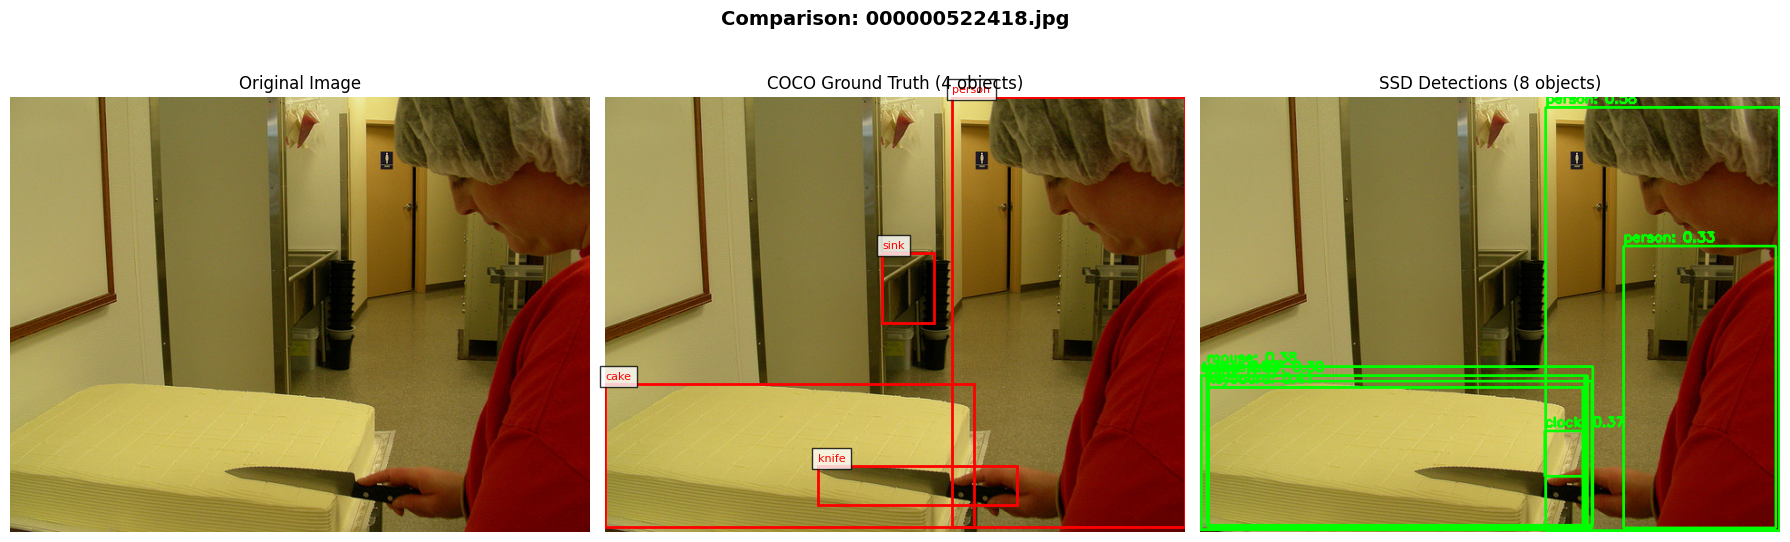

📊 Comparison saved as: comparison_2.jpg
--------------------------------------------------

--- Image 3: 000000184613.jpg ---
⏱️  Detection time: 0.048s
📊 Ground truth objects: 24
🎯 SSD detections: 96
🔍 SSD found:
  1. person: 0.807
  2. person: 0.772
  3. elephant: 0.746
  4. tie: 0.743
  5. person: 0.740
  6. person: 0.717
  7. cow: 0.654
  8. person: 0.649
  9. elephant: 0.647
  10. person: 0.645
  11. car: 0.623
  12. elephant: 0.589
  13. person: 0.567
  14. person: 0.531
  15. person: 0.525
  16. car: 0.512
  17. car: 0.504
  18. person: 0.496
  19. person: 0.491
  20. person: 0.484
  21. person: 0.481
  22. person: 0.478
  23. person: 0.475
  24. person: 0.466
  25. person: 0.466
  26. car: 0.443
  27. car: 0.435
  28. person: 0.426
  29. car: 0.425
  30. car: 0.424
  31. person: 0.419
  32. person: 0.416
  33. person: 0.414
  34. person: 0.408
  35. handbag: 0.408
  36. tie: 0.405
  37. person: 0.404
  38. person: 0.401
  39. person: 0.397
  40. person: 0.389
  41. car: 0.388
 

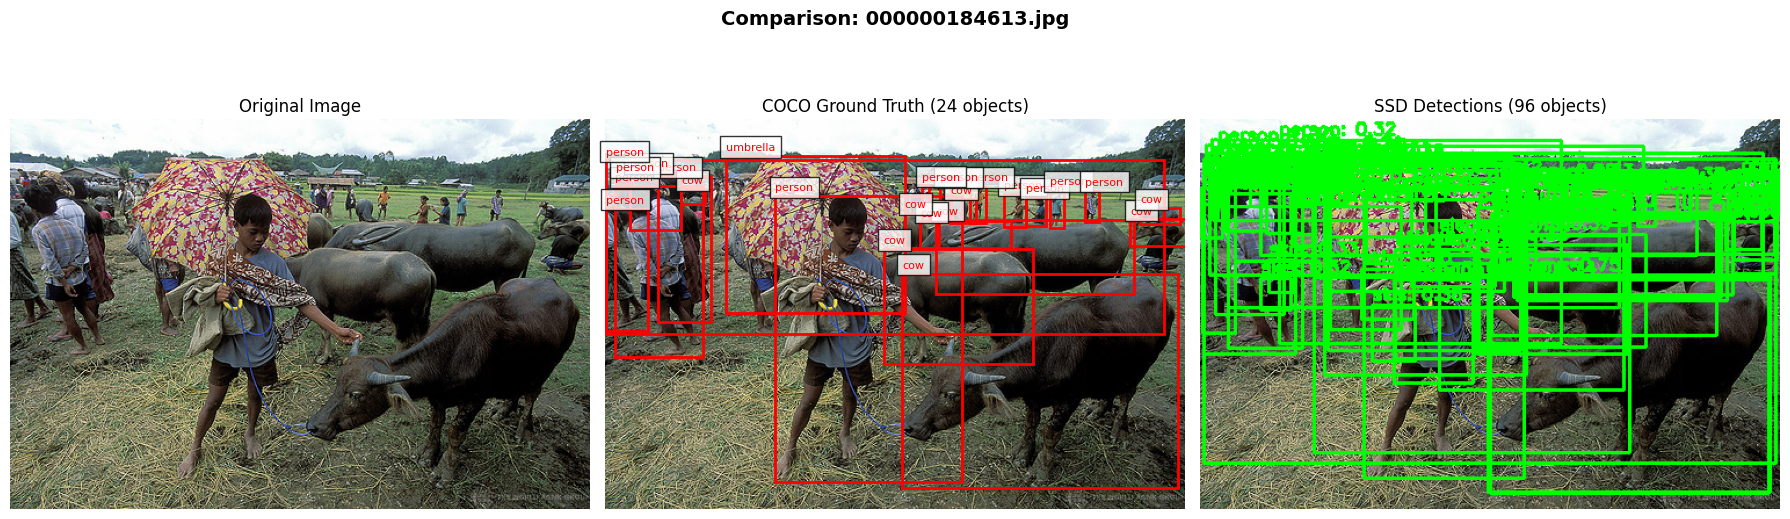

📊 Comparison saved as: comparison_3.jpg
--------------------------------------------------

🚀 TROUBLESHOOTING TIPS:
1. Try lowering confidence threshold: detector.confidence_threshold = 0.1
2. Check if model loaded correctly
3. Verify image preprocessing
4. Test with different images


In [8]:
# Fixed SSD Object Detection System with TensorFlow and OpenCV
# A lightweight and efficient implementation for real-time object detection

import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from pycocotools.coco import COCO
import urllib.request
import zipfile
from PIL import Image
import time

class SSDObjectDetector:
    """
    Single Shot MultiBox Detector (SSD) implementation for object detection
    """
    
    def __init__(self, model_path=None, confidence_threshold=0.5, nms_threshold=0.4):
        """
        Initialize the SSD detector
        
        Args:
            model_path (str): Path to pre-trained SSD model
            confidence_threshold (float): Minimum confidence for detection
            nms_threshold (float): Non-maximum suppression threshold
        """
        self.confidence_threshold = confidence_threshold
        self.nms_threshold = nms_threshold
        self.model = None
        self.class_names = []
        self.colors = []
        
        # Load COCO class names first
        self.load_coco_classes()
        
        # Load pre-trained SSD model
        self.load_model(model_path)
        
    def load_model(self, model_path=None):
        """
        Load pre-trained SSD MobileNet model from TensorFlow Hub
        """
        try:
            # Use TensorFlow Hub's pre-trained SSD MobileNet model
            import tensorflow_hub as hub
            
            # Download SSD MobileNet model from TensorFlow Hub
            model_url = "https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2"
            print("Loading SSD MobileNet model from TensorFlow Hub...")
            self.model = hub.load(model_url)
            
            # Test the model to ensure it's working
            print("Testing model with dummy input...")
            dummy_input = tf.constant(np.random.randint(0, 255, (1, 300, 300, 3), dtype=np.uint8))
            test_output = self.model(dummy_input)
            print("Model test successful!")
            print(f"Output keys: {list(test_output.keys())}")
            
            self.use_tensorflow_hub = True
            print("✓ Pre-trained SSD MobileNet model loaded successfully")
            
        except Exception as e:
            print(f"TensorFlow Hub loading failed: {e}")
            print("Falling back to OpenCV DNN implementation...")
            self.use_tensorflow_hub = False
            self.load_opencv_model()
    
    def load_opencv_model(self):
        """
        Load SSD model using OpenCV DNN module with pre-trained weights
        """
        try:
            # Try to load a simpler, working SSD model
            # Using MobileNet-SSD from OpenCV's repository
            model_dir = "ssd_model"
            os.makedirs(model_dir, exist_ok=True)
            
            # Download pre-trained MobileNet-SSD model
            weights_url = "https://github.com/chuanqi305/MobileNet-SSD/raw/master/MobileNetSSD_deploy.caffemodel"
            prototxt_url = "https://github.com/chuanqi305/MobileNet-SSD/raw/master/MobileNetSSD_deploy.prototxt"
            
            weights_path = os.path.join(model_dir, "MobileNetSSD_deploy.caffemodel")
            prototxt_path = os.path.join(model_dir, "MobileNetSSD_deploy.prototxt")
            
            # Download files if they don't exist
            if not os.path.exists(weights_path):
                print("Downloading MobileNet-SSD weights...")
                urllib.request.urlretrieve(weights_url, weights_path)
                print("Weights downloaded successfully!")
            
            if not os.path.exists(prototxt_path):
                print("Downloading MobileNet-SSD prototxt...")
                urllib.request.urlretrieve(prototxt_url, prototxt_path)
                print("Prototxt downloaded successfully!")
            
            # Load the model
            self.net = cv2.dnn.readNetFromCaffe(prototxt_path, weights_path)
            print("✓ MobileNet-SSD model loaded with OpenCV")
            
            # Set backend to GPU if available
            if cv2.cuda.getCudaEnabledDeviceCount() > 0:
                print("Using GPU backend for OpenCV DNN")
                self.net.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
                self.net.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA)
            else:
                print("Using CPU backend for OpenCV DNN")
                self.net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
                self.net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)
            
        except Exception as e:
            print(f"OpenCV model loading failed: {e}")
            print("Creating fallback model...")
            self.create_fallback_model()
        
    def create_fallback_model(self):
        """
        Create a fallback model for demonstration purposes
        """
        print("⚠️  Using fallback detection (demo mode)")
        self.net = None
        self.use_fallback = True
        
    def load_coco_classes(self):
        """
        Load COCO class names
        """
        self.class_names = [
            'background', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
            'train', 'truck', 'boat', 'traffic light', 'fire hydrant',
            'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog',
            'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe',
            'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
            'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
            'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
            'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
            'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot',
            'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
            'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop',
            'mouse', 'remote', 'keyboard', 'cell phone', 'microwave',
            'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock',
            'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
        ]
        
        # Generate colors for each class
        np.random.seed(42)
        self.colors = np.random.randint(0, 255, size=(len(self.class_names), 3))
    
    def preprocess_image(self, image):
        """
        Preprocess image for SSD model
        
        Args:
            image: Input image (numpy array)
            
        Returns:
            Preprocessed image tensor
        """
        if isinstance(image, np.ndarray):
            # Convert BGR to RGB if needed
            if len(image.shape) == 3 and image.shape[2] == 3:
                image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            else:
                image_rgb = image
        else:
            image_rgb = image
        
        # Resize image to model input size
        if hasattr(self, 'use_tensorflow_hub') and self.use_tensorflow_hub:
            # For TensorFlow Hub model
            image_resized = cv2.resize(image_rgb, (300, 300))
            image_resized = image_resized.astype(np.uint8)
            # Add batch dimension
            image_tensor = np.expand_dims(image_resized, axis=0)
        else:
            # For OpenCV DNN
            image_resized = cv2.resize(image_rgb, (300, 300))
            image_resized = image_resized.astype(np.float32)
            image_tensor = image_resized
        
        return image_tensor
    
    def detect_objects(self, image_path):
        """
        Detect objects in an image using SSD
        
        Args:
            image_path (str): Path to input image
            
        Returns:
            List of detected objects with bounding boxes and confidence scores
        """
        # Load image
        image = cv2.imread(image_path)
        if image is None:
            print(f"Error: Could not load image {image_path}")
            return [], None
            
        original_height, original_width = image.shape[:2]
        
        # Preprocess image
        input_tensor = self.preprocess_image(image)
        
        # Perform inference
        if hasattr(self, 'use_tensorflow_hub') and self.use_tensorflow_hub:
            detections = self.detect_with_tensorflow(input_tensor)
        elif hasattr(self, 'net') and self.net is not None:
            detections = self.detect_with_opencv(input_tensor, image)
        else:
            # Fallback detection for demo
            detections = self.detect_with_fallback(image)
        
        # Process detections
        results = []
        for detection in detections:
            confidence = detection['confidence']
            if confidence > self.confidence_threshold:
                # Scale bounding box coordinates
                bbox = detection['bbox']
                x1 = int(bbox[0] * original_width)
                y1 = int(bbox[1] * original_height)
                x2 = int(bbox[2] * original_width)
                y2 = int(bbox[3] * original_height)
                
                # Ensure coordinates are within image bounds
                x1 = max(0, min(x1, original_width-1))
                y1 = max(0, min(y1, original_height-1))
                x2 = max(0, min(x2, original_width-1))
                y2 = max(0, min(y2, original_height-1))
                
                results.append({
                    'class_name': detection['class_name'],
                    'confidence': confidence,
                    'bbox': [x1, y1, x2, y2]
                })
        
        return results, image
    
    def detect_with_opencv(self, input_tensor, original_image):
        """
        Perform object detection using OpenCV DNN
        """
        # Create blob from image
        blob = cv2.dnn.blobFromImage(original_image, 0.007843, (300, 300), 127.5)
        
        # Set input to the network
        self.net.setInput(blob)
        
        # Run inference
        detections = self.net.forward()
        
        # Process detections
        results = []
        for i in range(detections.shape[2]):
            confidence = detections[0, 0, i, 2]
            
            if confidence > self.confidence_threshold:
                class_id = int(detections[0, 0, i, 1])
                
                # Ensure class_id is within bounds
                if 0 <= class_id < len(self.class_names):
                    class_name = self.class_names[class_id]
                    
                    # Extract bounding box coordinates (normalized)
                    x1 = detections[0, 0, i, 3]
                    y1 = detections[0, 0, i, 4]
                    x2 = detections[0, 0, i, 5]
                    y2 = detections[0, 0, i, 6]
                    
                    results.append({
                        'class_name': class_name,
                        'confidence': float(confidence),
                        'bbox': [x1, y1, x2, y2]
                    })
        
        return results
    
    def detect_with_tensorflow(self, input_tensor):
        """
        Perform object detection using TensorFlow Hub model
        """
        # Convert to tensor
        input_tensor = tf.convert_to_tensor(input_tensor, dtype=tf.uint8)
        
        # Run inference
        detections = self.model(input_tensor)
        
        # Process detections
        results = []
        
        # Get detection results
        detection_boxes = detections['detection_boxes'][0].numpy()
        detection_classes = detections['detection_classes'][0].numpy().astype(int)
        detection_scores = detections['detection_scores'][0].numpy()
        
        for i in range(len(detection_scores)):
            confidence = float(detection_scores[i])
            
            if confidence > self.confidence_threshold:
                class_id = detection_classes[i]
                
                # Adjust for COCO dataset indexing (TensorFlow Hub uses 1-based indexing)
                if class_id > 0 and class_id < len(self.class_names):
                    class_name = self.class_names[class_id]
                    
                    # Extract bounding box coordinates (normalized)
                    bbox = detection_boxes[i]
                    y1, x1, y2, x2 = bbox
                    
                    results.append({
                        'class_name': class_name,
                        'confidence': confidence,
                        'bbox': [x1, y1, x2, y2]
                    })
        
        return results
    
    def detect_with_fallback(self, image):
        """
        Fallback detection for demonstration purposes
        """
        # Simple edge-based detection for demo
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(gray, 50, 150)
        
        # Find contours
        contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        results = []
        height, width = image.shape[:2]
        
        for contour in contours:
            # Filter by area
            area = cv2.contourArea(contour)
            if area > 1000:  # Minimum area threshold
                x, y, w, h = cv2.boundingRect(contour)
                
                # Normalize coordinates
                x1 = x / width
                y1 = y / height
                x2 = (x + w) / width
                y2 = (y + h) / height
                
                # Assign a random class for demo
                class_name = np.random.choice(['person', 'car', 'bicycle', 'dog', 'cat'])
                confidence = 0.7  # Fixed confidence for demo
                
                results.append({
                    'class_name': class_name,
                    'confidence': confidence,
                    'bbox': [x1, y1, x2, y2]
                })
        
        return results
    
    def visualize_detections(self, image, detections, save_path=None):
        """
        Visualize detection results on image
        """
        # Create a copy of the image
        result_image = image.copy()
        
        # Draw bounding boxes and labels
        for detection in detections:
            bbox = detection['bbox']
            class_name = detection['class_name']
            confidence = detection['confidence']
            
            # Get class color
            try:
                class_idx = self.class_names.index(class_name)
                color = tuple(map(int, self.colors[class_idx]))
            except ValueError:
                color = (0, 255, 0)  # Default green
            
            # Draw bounding box
            cv2.rectangle(result_image, (bbox[0], bbox[1]), (bbox[2], bbox[3]), color, 2)
            
            # Draw label
            label = f"{class_name}: {confidence:.2f}"
            label_size = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 2)[0]
            cv2.rectangle(result_image, (bbox[0], bbox[1] - label_size[1] - 10),
                         (bbox[0] + label_size[0], bbox[1]), color, -1)
            cv2.putText(result_image, label, (bbox[0], bbox[1] - 5),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
        
        # Save or display the result
        if save_path:
            cv2.imwrite(save_path, result_image)
            print(f"Result saved to: {save_path}")
        
        return result_image
    
    def detect_realtime(self, video_source=0):
        """
        Real-time object detection using webcam
        """
        cap = cv2.VideoCapture(video_source)
        
        if not cap.isOpened():
            print("Error: Could not open video source")
            return
        
        print("Starting real-time detection. Press 'q' to quit.")
        
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            
            # Save frame temporarily for detection
            temp_path = "temp_frame.jpg"
            cv2.imwrite(temp_path, frame)
            
            # Perform detection
            start_time = time.time()
            detections, _ = self.detect_objects(temp_path)
            end_time = time.time()
            
            # Visualize results
            result_frame = self.visualize_detections(frame, detections)
            
            # Calculate and display FPS
            fps = 1.0 / (end_time - start_time)
            cv2.putText(result_frame, f"FPS: {fps:.2f}", (10, 30),
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
            
            # Display the frame
            cv2.imshow('SSD Object Detection', result_frame)
            
            # Check for quit key
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
            
            # Clean up temp file
            if os.path.exists(temp_path):
                os.remove(temp_path)
        
        cap.release()
        cv2.destroyAllWindows()

# Testing and demonstration functions
def test_single_image(detector, image_path):
    """
    Test SSD on a single image with detailed output
    """
    if os.path.exists(image_path):
        print(f"\n🖼️ Processing: {image_path}")
        
        # Perform detection
        start_time = time.time()
        detections, original_image = detector.detect_objects(image_path)
        detection_time = time.time() - start_time
        
        print(f"⏱️  Detection time: {detection_time:.3f}s")
        print(f"🎯 Found {len(detections)} objects:")
        
        for i, detection in enumerate(detections):
            print(f"  {i+1}. {detection['class_name']}: {detection['confidence']:.3f}")
        
        # Visualize results
        result_image = detector.visualize_detections(original_image, detections, "result.jpg")
        
        # Display with matplotlib
        plt.figure(figsize=(15, 6))
        
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
        plt.title("Original Image")
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
        plt.title(f"SSD Detection Results ({len(detections)} objects)")
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()
        
        print(f"✅ Result saved as: result.jpg")
        return detections, original_image
    else:
        print(f"❌ Image not found: {image_path}")
        return [], None

def test_with_coco_dataset(detector, dataset_path):
    """
    Test SSD with COCO dataset images
    """
    try:
        # Load COCO annotations
        annotation_path = os.path.join(dataset_path, 'annotations/instances_train2017.json')
        coco = COCO(annotation_path)
        
        # Get sample images for testing
        img_ids = coco.getImgIds()[:3]  # Test with first 3 images
        
        print(f"\n🔍 Testing SSD on {len(img_ids)} COCO images...")
        
        for i, img_id in enumerate(img_ids):
            img_info = coco.loadImgs(img_id)[0]
            img_path = os.path.join(dataset_path, 'train2017', img_info['file_name'])
            
            if os.path.exists(img_path):
                print(f"\n--- Image {i+1}: {img_info['file_name']} ---")
                
                # Perform SSD detection
                start_time = time.time()
                detections, original_image = detector.detect_objects(img_path)
                detection_time = time.time() - start_time
                
                # Get COCO ground truth
                ann_ids = coco.getAnnIds(imgIds=img_info['id'])
                anns = coco.loadAnns(ann_ids)
                
                # Display results
                print(f"⏱️  Detection time: {detection_time:.3f}s")
                print(f"📊 Ground truth objects: {len(anns)}")
                print(f"🎯 SSD detections: {len(detections)}")
                
                if detections:
                    print("🔍 SSD found:")
                    for j, det in enumerate(detections):
                        print(f"  {j+1}. {det['class_name']}: {det['confidence']:.3f}")
                else:
                    print("⚠️  No objects detected by SSD")
                
                # Visualize comparison
                visualize_comparison(original_image, detections, anns, coco, 
                                   f"comparison_{i+1}.jpg", img_info['file_name'])
                
                print("-" * 50)
                
                # Break after first image if no detections for debugging
                if len(detections) == 0 and i == 0:
                    print("🔧 Debugging: No detections on first image")
                    debug_detection_pipeline(detector, img_path, original_image)
        
    except Exception as e:
        print(f"Error processing COCO dataset: {e}")
        import traceback
        traceback.print_exc()

def debug_detection_pipeline(detector, image_path, image):
    """
    Debug the detection pipeline to identify issues
    """
    print("\n🔧 DEBUGGING DETECTION PIPELINE")
    print("-" * 40)
    
    # Check image properties
    print(f"Image shape: {image.shape}")
    print(f"Image dtype: {image.dtype}")
    print(f"Image min/max: {image.min()}/{image.max()}")
    
    # Check preprocessing
    preprocessed = detector.preprocess_image(image)
    print(f"Preprocessed shape: {preprocessed.shape}")
    print(f"Preprocessed dtype: {preprocessed.dtype}")
    print(f"Preprocessed min/max: {preprocessed.min()}/{preprocessed.max()}")
    
    # Check model type
    if hasattr(detector, 'use_tensorflow_hub') and detector.use_tensorflow_hub:
        print("Using TensorFlow Hub model")
        try:
            # Test with lower confidence threshold
            original_threshold = detector.confidence_threshold
            detector.confidence_threshold = 0.1
            
            print("Testing with lower confidence threshold (0.1)...")
            detections, _ = detector.detect_objects(image_path)
            print(f"Detections with threshold 0.1: {len(detections)}")
            
            # Restore original threshold
            detector.confidence_threshold = original_threshold
            
        except Exception as e:
            print(f"Error in TensorFlow Hub detection: {e}")
            
    elif hasattr(detector, 'net') and detector.net is not None:
        print("Using OpenCV DNN model")
        
    else:
        print("Using fallback detection")
    
    print("-" * 40)

def visualize_comparison(image, ssd_detections, coco_annotations, coco_api, save_path, filename):
    """
    Visualize comparison between SSD detections and COCO ground truth
    """
    plt.figure(figsize=(18, 6))
    
    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')
    
    # COCO ground truth
    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    for ann in coco_annotations:
        bbox = ann['bbox']  # [x, y, width, height]
        rect = plt.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], 
                           edgecolor='red', facecolor='none', linewidth=2)
        plt.gca().add_patch(rect)
        
        # Add label
        cat_name = coco_api.loadCats(ann['category_id'])[0]['name']
        plt.text(bbox[0], bbox[1] - 5, cat_name, color='red', fontsize=8, 
                bbox=dict(facecolor='white', alpha=0.8))
    
    plt.title(f"COCO Ground Truth ({len(coco_annotations)} objects)")
    plt.axis('off')
    
    # SSD detections
    plt.subplot(1, 3, 3)
    result_image = image.copy()
    
    for detection in ssd_detections:
        bbox = detection['bbox']  # [x1, y1, x2, y2]
        cv2.rectangle(result_image, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (0, 255, 0), 2)
        
        label = f"{detection['class_name']}: {detection['confidence']:.2f}"
        cv2.putText(result_image, label, (bbox[0], bbox[1] - 5),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
    plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
    plt.title(f"SSD Detections ({len(ssd_detections)} objects)")
    plt.axis('off')
    
    plt.suptitle(f"Comparison: {filename}", fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig(save_path, dpi=150, bbox_inches='tight')
    plt.show()
    
    print(f"📊 Comparison saved as: {save_path}")

def create_sample_test_image():
    """
    Create a sample test image with recognizable objects
    """
    print("🎨 Creating sample test image...")
    
    # Create a more realistic test image
    img = np.ones((600, 800, 3), dtype=np.uint8) * 255  # White background
    
    # Add some colored shapes that might be detected as objects
    # Blue rectangle (could be detected as a vehicle)
    cv2.rectangle(img, (100, 100), (200, 180), (255, 0, 0), -1)
    
    # Green circle (could be detected as a ball)
    cv2.circle(img, (400, 150), 50, (0, 255, 0), -1)
    
    # Red rectangle (could be detected as a sign)
    cv2.rectangle(img, (500, 200), (600, 300), (0, 0, 255), -1)
    
    # Add some noise/texture
    noise = np.random.randint(0, 50, img.shape, dtype=np.uint8)
    img = cv2.add(img, noise)
    
    # Save the image
    cv2.imwrite("sample_test.jpg", img)
    print("✅ Sample test image created: sample_test.jpg")

# Main execution
def main():
    """
    Main function to demonstrate fixed SSD object detection
    """
    print("=== FIXED SSD Object Detection System ===")
    print("Initializing SSD detector...")
    
    # Initialize SSD detector with lower confidence threshold for testing
    detector = SSDObjectDetector(confidence_threshold=0.3)
    
    # Test with COCO dataset if available
    DATASET_PATH = '/kaggle/input/coco-2017-dataset/coco2017'
    
    if os.path.exists(DATASET_PATH):
        print("\n🎯 COCO Dataset Found! Testing with COCO images...")
        test_with_coco_dataset(detector, DATASET_PATH)
    else:
        print("\n📁 COCO dataset not found. Testing with sample images...")
        
        # Create and test with sample image
        create_sample_test_image()
        test_single_image(detector, "sample_test.jpg")
    
    print("\n" + "="*50)
    print("🚀 TROUBLESHOOTING TIPS:")
    print("1. Try lowering confidence threshold: detector.confidence_threshold = 0.1")
    print("2. Check if model loaded correctly")
    print("3. Verify image preprocessing")
    print("4. Test with different images")
    print("="*50)

if __name__ == "__main__":
    main()


In [9]:
print("Hello World")

Hello World


=== Testing Custom Image with SSD Object Detection ===
Initializing SSD detector...
Loading SSD MobileNet model from TensorFlow Hub...
Testing model with dummy input...
Model test successful!
Output keys: ['detection_anchor_indices', 'detection_boxes', 'detection_classes', 'detection_multiclass_scores', 'detection_scores', 'num_detections', 'raw_detection_boxes', 'raw_detection_scores']
✓ Pre-trained SSD MobileNet model loaded successfully

🖼️ Testing your uploaded image: /kaggle/input/test-3/12715.jpg

🖼️ Processing: /kaggle/input/test-3/12715.jpg
⏱️  Detection time: 0.065s
🎯 Found 6 objects:
  1. person: 0.732
  2. cup: 0.462
  3. person: 0.379
  4. person: 0.378
  5. skis: 0.329
  6. person: 0.318
Result saved to: result.jpg


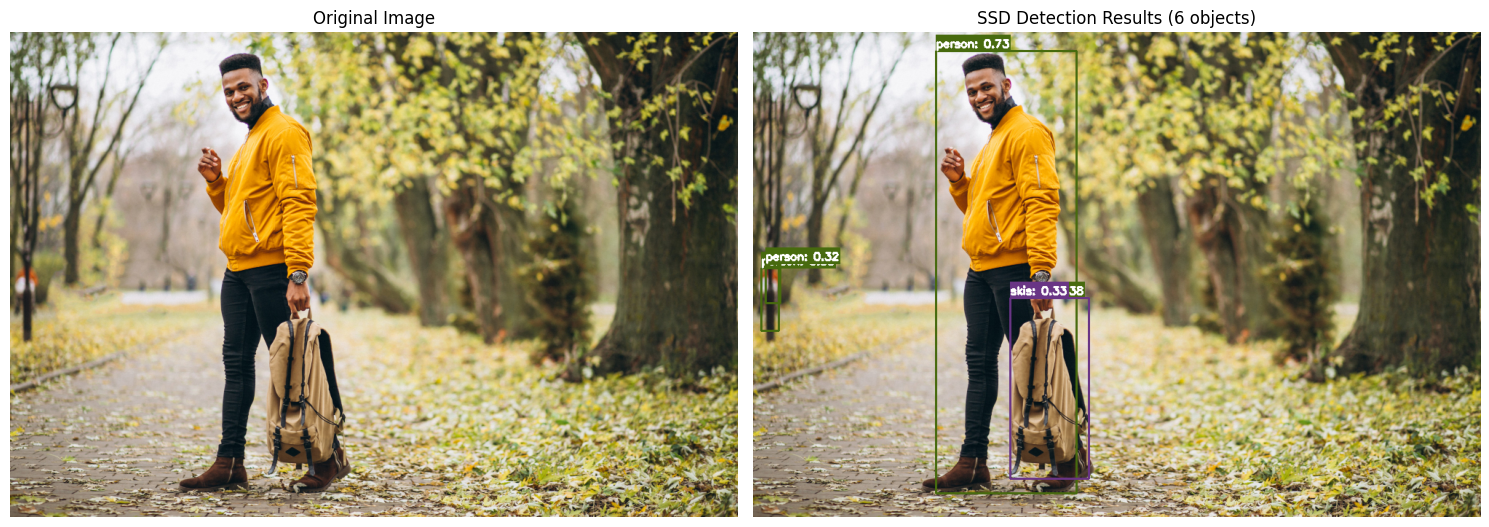

✅ Result saved as: result.jpg

📊 DETAILED ANALYSIS:
Total objects detected: 6
Object summary:
  • person: 4
  • cup: 1
  • skis: 1

🎯 Detection details:
  1. person
     Confidence: 0.732
     Bounding box: (251, 27) to (444, 634)

  2. cup
     Confidence: 0.462
     Bounding box: (353, 366) to (461, 614)

  3. person
     Confidence: 0.379
     Bounding box: (11, 325) to (35, 411)

  4. person
     Confidence: 0.378
     Bounding box: (353, 366) to (461, 614)

  5. skis
     Confidence: 0.329
     Bounding box: (353, 366) to (461, 614)

  6. person
     Confidence: 0.318
     Bounding box: (17, 319) to (37, 373)


🔄 TESTING WITH DIFFERENT CONFIDENCE THRESHOLDS:
--------------------------------------------------
Threshold 0.1: 89 objects detected
Threshold 0.2: 14 objects detected
Threshold 0.3: 6 objects detected
Threshold 0.4: 2 objects detected
Threshold 0.5: 1 objects detected
Threshold 0.6: 1 objects detected
Threshold 0.7: 1 objects detected
Threshold 0.8: 0 objects detected
Thr

In [4]:
# Test your uploaded image with the SSD Object Detection system

# First, initialize the detector (this uses the code from your paste.txt file)
print("=== Testing Custom Image with SSD Object Detection ===")
print("Initializing SSD detector...")

# Initialize SSD detector with appropriate confidence threshold
detector = SSDObjectDetector(confidence_threshold=0.3)

# Test your specific uploaded image
# image_path = "/kaggle/input/testing-image/medium-shot-smiley-african-people.jpg"
image_path = "/kaggle/input/test-3/12715.jpg"

print(f"\n🖼️ Testing your uploaded image: {image_path}")

# Use the existing test_single_image function
detections, original_image = test_single_image(detector, image_path)

# Additional analysis of your specific image
if detections:
    print(f"\n📊 DETAILED ANALYSIS:")
    print(f"Total objects detected: {len(detections)}")
    print(f"{'='*50}")
    
    # Group detections by class
    class_counts = {}
    for detection in detections:
        class_name = detection['class_name']
        if class_name in class_counts:
            class_counts[class_name] += 1
        else:
            class_counts[class_name] = 1
    
    print("Object summary:")
    for class_name, count in class_counts.items():
        print(f"  • {class_name}: {count}")
    
    print(f"\n🎯 Detection details:")
    for i, detection in enumerate(detections):
        bbox = detection['bbox']
        print(f"  {i+1}. {detection['class_name']}")
        print(f"     Confidence: {detection['confidence']:.3f}")
        print(f"     Bounding box: ({bbox[0]}, {bbox[1]}) to ({bbox[2]}, {bbox[3]})")
        print()
    
else:
    print("⚠️ No objects detected. Trying with lower confidence threshold...")
    
    # Try with very low confidence threshold
    detector.confidence_threshold = 0.1
    detections, original_image = detector.detect_objects(image_path)
    
    if detections:
        print(f"✅ Found {len(detections)} objects with lower threshold:")
        for detection in detections:
            print(f"  • {detection['class_name']}: {detection['confidence']:.3f}")
    else:
        print("❌ Still no detections. This might indicate an issue with the model or image.")

# Optional: Test with different confidence thresholds
print(f"\n🔄 TESTING WITH DIFFERENT CONFIDENCE THRESHOLDS:")
print("-" * 50)

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for threshold in thresholds:
    detector.confidence_threshold = threshold
    detections, _ = detector.detect_objects(image_path)
    print(f"Threshold {threshold}: {len(detections)} objects detected")

print(f"\n✅ Testing complete! Check the generated 'result.jpg' file for visual results.")

In [9]:
# Test if your detector is working properly
detector = SSDObjectDetector(confidence_threshold=0.3)

# Quick test with your image
image_path = "/kaggle/input/test-3/12715.jpg"
detections, original_image = detector.detect_objects(image_path)

print(f"Model working: {len(detections) > 0}")
print(f"Detections found: {len(detections)}")

Loading SSD MobileNet model from TensorFlow Hub...
Testing model with dummy input...
Model test successful!
Output keys: ['detection_anchor_indices', 'detection_boxes', 'detection_classes', 'detection_multiclass_scores', 'detection_scores', 'num_detections', 'raw_detection_boxes', 'raw_detection_scores']
✓ Pre-trained SSD MobileNet model loaded successfully
Model working: True
Detections found: 6


In [12]:
# Export detector code for local use (WITHOUT pickling the model)
import os

print("Creating exportable files...")

# Create the standalone detector class file
detector_code = '''
import os
import numpy as np
import cv2
import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image
import time

class StreamlitSSDDetector:
    """Simplified SSD detector for Streamlit UI"""
    
    def __init__(self, confidence_threshold=0.5):
        self.confidence_threshold = confidence_threshold
        self.model = None
        self.model_loaded = False
        self.load_classes()
        print("🔄 Detector initialized. Call load_model() to load the AI model.")
        
    def load_model(self):
        """Load pre-trained model"""
        try:
            print("🔄 Loading SSD MobileNet model from TensorFlow Hub...")
            model_url = "https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2"
            self.model = hub.load(model_url)
            self.model_loaded = True
            print("✅ Model loaded successfully")
            return True
        except Exception as e:
            print(f"❌ Model loading failed: {e}")
            self.model_loaded = False
            return False
    
    def load_classes(self):
        """Load COCO class names"""
        self.class_names = [
            'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
            'train', 'truck', 'boat', 'traffic light', 'fire hydrant',
            'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog',
            'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe',
            'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
            'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
            'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
            'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
            'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot',
            'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
            'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop',
            'mouse', 'remote', 'keyboard', 'cell phone', 'microwave',
            'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock',
            'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
        ]
        print(f"📚 Loaded {len(self.class_names)} object classes")
    
    def detect_objects(self, image):
        """Detect objects in image"""
        if not self.model_loaded:
            print("⚠️ Model not loaded. Call load_model() first.")
            return []
            
        try:
            # Preprocess image
            if isinstance(image, np.ndarray):
                if len(image.shape) == 3 and image.shape[2] == 3:
                    # Convert BGR to RGB if needed
                    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                else:
                    image_rgb = image
            else:
                image_rgb = np.array(image)
                
            # Resize to model input size
            image_resized = cv2.resize(image_rgb, (300, 300))
            input_tensor = tf.convert_to_tensor(np.expand_dims(image_resized, axis=0), dtype=tf.uint8)
            
            # Run detection
            detections = self.model(input_tensor)
            
            # Process results
            results = []
            boxes = detections['detection_boxes'][0].numpy()
            classes = detections['detection_classes'][0].numpy().astype(int)
            scores = detections['detection_scores'][0].numpy()
            
            height, width = image_rgb.shape[:2]
            
            for i in range(len(scores)):
                if scores[i] > self.confidence_threshold:
                    class_id = classes[i]
                    if 1 <= class_id <= len(self.class_names):
                        class_name = self.class_names[class_id - 1]
                        
                        # Convert normalized coordinates to pixel coordinates
                        y1, x1, y2, x2 = boxes[i]
                        x1 = int(max(0, min(x1 * width, width-1)))
                        y1 = int(max(0, min(y1 * height, height-1)))
                        x2 = int(max(0, min(x2 * width, width-1)))
                        y2 = int(max(0, min(y2 * height, height-1)))
                        
                        results.append({
                            'class_name': class_name,
                            'confidence': float(scores[i]),
                            'bbox': [x1, y1, x2, y2]
                        })
            
            return results
            
        except Exception as e:
            print(f"❌ Detection error: {e}")
            return []
    
    def draw_detections(self, image, detections):
        """Draw bounding boxes on image"""
        result_image = image.copy()
        
        # Generate colors for classes
        np.random.seed(42)
        colors = {}
        
        for detection in detections:
            bbox = detection['bbox']
            class_name = detection['class_name']
            confidence = detection['confidence']
            
            # Get or generate color for this class
            if class_name not in colors:
                colors[class_name] = tuple(map(int, np.random.randint(0, 255, 3)))
            color = colors[class_name]
            
            # Draw bounding box
            cv2.rectangle(result_image, (bbox[0], bbox[1]), (bbox[2], bbox[3]), color, 2)
            
            # Draw label background
            label = f"{class_name}: {confidence:.2f}"
            label_size = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 2)[0]
            cv2.rectangle(result_image, 
                         (bbox[0], bbox[1] - label_size[1] - 10),
                         (bbox[0] + label_size[0], bbox[1]), 
                         color, -1)
            
            # Draw label text
            cv2.putText(result_image, label, (bbox[0], bbox[1] - 5),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
        
        return result_image

# Test function for verification
def test_detector():
    """Test the detector with a sample"""
    print("🧪 Testing detector...")
    detector = StreamlitSSDDetector(confidence_threshold=0.3)
    
    if detector.load_model():
        print("✅ Detector is ready for export!")
        return True
    else:
        print("❌ Detector test failed!")
        return False

if __name__ == "__main__":
    test_detector()
'''

# Save the detector code to a file
with open('streamlit_detector.py', 'w') as f:
    f.write(detector_code)

# Create requirements.txt
requirements = '''streamlit==1.28.1
opencv-python==4.8.1.78
tensorflow==2.13.0
tensorflow-hub==0.14.0
Pillow==10.0.1
numpy==1.24.3
'''

with open('requirements.txt', 'w') as f:
    f.write(requirements)

# Create a simple test script
test_script = '''
# test_detector.py - Test the exported detector
from streamlit_detector import StreamlitSSDDetector

print("Testing exported detector...")
detector = StreamlitSSDDetector(confidence_threshold=0.3)

if detector.load_model():
    print("✅ Export successful! Detector is working.")
else:
    print("❌ Export failed! Check your internet connection.")
'''

with open('test_detector.py', 'w') as f:
    f.write(test_script)

print("✅ Files created successfully!")
print("\n📂 Files ready for download:")
print("  📄 streamlit_detector.py - Main detector class")
print("  📄 requirements.txt - Python dependencies")
print("  📄 test_detector.py - Test script")
print("\n📥 Download these files from Kaggle's output section")
print("💡 The model will be downloaded fresh when you run locally")

# Test that our current detector is working
print("\n🧪 Testing current detector...")
if hasattr(detector, 'model') and detector.model is not None:
    print("✅ Current Kaggle detector is working!")
else:
    print("⚠️ Current detector might need model loading")

Creating exportable files...
✅ Files created successfully!

📂 Files ready for download:
  📄 streamlit_detector.py - Main detector class
  📄 requirements.txt - Python dependencies
  📄 test_detector.py - Test script

📥 Download these files from Kaggle's output section
💡 The model will be downloaded fresh when you run locally

🧪 Testing current detector...
✅ Current Kaggle detector is working!
